In [101]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
!ls -l images/

total 16736
-rw-r--r-- 1 ecbm4040 ecbm4040    62035 Dec  9 01:06 composition7_1.jpg
-rw-r--r-- 1 ecbm4040 ecbm4040   110795 Dec  9 01:06 composition7.jpg
-rw-r--r-- 1 ecbm4040 ecbm4040    37370 Dec  9 01:06 Guernica.jpg
-rw-r--r-- 1 ecbm4040 ecbm4040    40896 Dec  9 01:06 hk.jpg
-rw-r--r-- 1 ecbm4040 ecbm4040    56427 Dec  9 01:06 hongkong-guernica-side-by-side.jpg
-rw-r--r-- 1 ecbm4040 ecbm4040   193964 Dec  9 01:06 monet.jpg
-rw-r--r-- 1 ecbm4040 ecbm4040   204053 Dec  9 01:06 nyc_night.jpg
-rw-r--r-- 1 ecbm4040 ecbm4040   173093 Dec  9 01:06 output.jpeg
-rw-r--r-- 1 ecbm4040 ecbm4040 13440514 Dec  9 01:06 scream.jpg
-rw-r--r-- 1 ecbm4040 ecbm4040   334862 Dec  9 01:06 seated_nude.jpg
-rw-r--r-- 1 ecbm4040 ecbm4040   339415 Dec  9 01:06 sg_night.jpg
-rw-r--r-- 1 ecbm4040 ecbm4040   212337 Dec  9 01:06 shanghai_pudong.jpg
-rw-r--r-- 1 ecbm4040 ecbm4040    61174 Dec  9 01:06 shipwreck.jpg
-rw-r--r-- 1 ecbm4040 ecbm4040      332 Dec  9 01:06 source.txt
-rw-r--r-- 1 ecbm4040 ecbm4040   6

## Define configuration

In [170]:
def set_config():
    config = {}
    config['vgg_params_path'] = "./vgg19.npy"    
    config['learning_rate'] = 2
    config['noisy_img_content'] = True
#     config['noise_ratio'] = 0.6
    config['noise_ratio'] = 0.4
    config['iters'] = 500
    config['alpha'] = 5
#     config['alpha'] = 0.001
    config['beta'] = 100
#     config['style_loss_layers_w'] = [1.0, 1.0, 1.0, 1.0, 1.0]    
    config['style_loss_layers_w'] = [.5, 1.0, 1.5, 3.0, 4.0]
    config['num_style_layers'] = 5
#     config['num_style_layers'] = 1
    config['content_layer_num'] = 4
#     config['loss'] = "content"
#     config['loss'] = "style"    
    config['loss'] = "all"
    config['add_coef'] = False
    config['output_clip_hard'] = True
#     config['pooling_method'] = "max"    
    config['pooling_method'] = "ave"
    config['small_size_content_img'] = True
    config['small_size_style_img'] = True    
#     config['use_smaller_size_img'] = False
#     config['pooling_stride'] = 4
    config['pooling_stride'] = 2    
    config['optimizer'] = "adam"
    return config

## Generate Image

In [171]:
import stylize

content = 'tubingen_van_gogh.jpg'
style = 'composition7_1.jpg'

config = set_config()
final_image, total_losses, content_losses, style_losses = stylize.apply(content, style, config)

type(loss), type(n), type(m) <class 'tensorflow.python.framework.ops.Tensor'> <class 'tensorflow.python.framework.ops.Tensor'> <class 'tensorflow.python.framework.ops.Tensor'>
type(loss), type(n), type(m) <class 'numpy.float32'> <class 'numpy.int32'> <class 'numpy.int32'>
Iteration: 0, total loss: 7.915896360523798e+23, content loss: 5991365632.0, style loss: 7.915896563185782e+21
Iteration: 100, total loss: 6.862820988217645e+21, content loss: 35491766272.0, style loss: 6.862820847480157e+19
Iteration: 200, total loss: 2.786005542484868e+21, content loss: 37789745152.0, style loss: 2.786005674426263e+19
Iteration: 300, total loss: 1.7629820656177098e+21, content loss: 39016341504.0, style loss: 1.7629820128411517e+19
Iteration: 400, total loss: 1.299936025680311e+21, content loss: 39793635328.0, style loss: 1.2999359948939854e+19


## Visualize Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


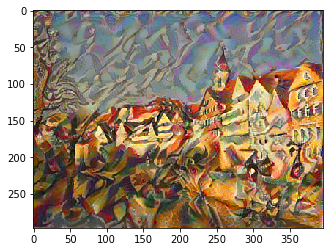

In [172]:
import matplotlib.pyplot as plt
final_image1 = final_image[0].astype(int)
final_image1 = final_image1[:, :, ::-1]
plt.imshow(final_image1)

## Plot Losses

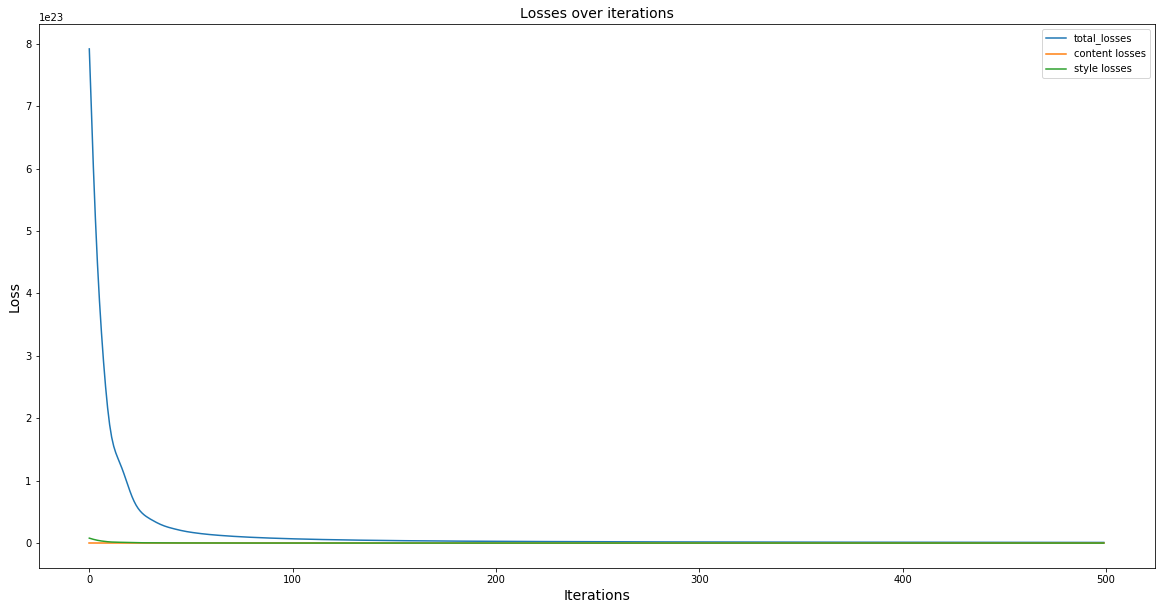

In [176]:
import pandas as pd
plt.figure(figsize=(20, 10))
ax1 = plt.gca()
total_losses = pd.DataFrame(total_losses)
content_losses = pd.DataFrame(content_losses)
style_losses = pd.DataFrame(style_losses)
ax1.plot(total_losses, label='total_losses')
ax1.plot(content_losses, label='content losses')
ax1.plot(style_losses, label='style losses')
ax1.legend()
ax1.set_title("Losses over iterations", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_xlabel("Iterations", fontsize=14);